## Introduction: Environment temperature change
About the dataset: 

The FAOSTAT Temperature Change domain disseminates statistics of mean surface temperature change by area, with annual updates. The current dissemination covers the period 1961–2019

Sources and links:
- Publicly available GISTEMP data, the Global Surface Temperature Change data distributed by the National Aeronautics and Space Administration Goddard Institute for Space Studies (NASA-GISS)
- Kaggle: https://www.kaggle.com/datasets/sevgisarac/temperature-change

Processed: No

Sample: 284 different areas resulting in 9656 observations (on temperature change and its std, 4828 observations each)

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding="latin1")

## Splitting and describing data

### Splitting, and processing data, and uploading it to different csv's 

In [70]:
df_temp = df[df["Element"] == "Temperature change"].drop(columns=["Element Code", "Element", "Unit"])

df_temp_melted = df_temp.melt(id_vars=["Area Code", "Area", "Months Code", "Months"], var_name="Year", value_name="Temperature Change")

df_temp_melted["Year"] = df_temp_melted["Year"].str[1:].astype(int)

df_temp_melted = df_temp_melted[df_temp_melted["Months"].isin(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])]

df_temp_melted.to_csv("Splitted_data/temperatureChange.csv", index = False)

In [71]:
df_std = df[df["Element"] == "Standard Deviation"].drop(columns=["Element Code", "Element", "Unit"])

df_std_melted = df_std.melt(id_vars=["Area Code", "Area", "Months Code", "Months"], var_name="Year", value_name="Standard Deviation")

df_std_melted["Year"] = df_std_melted["Year"].str[1:].astype(int)

df_std_melted = df_std_melted[df_std_melted["Months"].isin(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])]

df_std_melted.to_csv('Splitted_data/temperatureChange.csv', index = False)

### Describing data

#### Temperature change
Columns:
- Area Code (The numerical code of area column, type of area code is an integer)
- Area (Countries and Territories (In 2019: 190 countries and 37 other territorial entities.), type of area is an object)
- Months Code (The numerical code of months column, type of months code is an integer)
- Months (Name of the month)
- Year
- Temperature Change (Celsius degrees °C, temperature change with respect to a baseline climatology, corresponding to the period 1951–1980)

Variable: Temperature Change (continuous type)

In [72]:
df_temp_melted.head(5)

,Area Code,Area,Months Code,Months,Year,Temperature Change
0,2,Afghanistan,7001,January,1961,0.777
1,2,Afghanistan,7002,February,1961,-1.743
2,2,Afghanistan,7003,March,1961,0.516
3,2,Afghanistan,7004,April,1961,-1.709
4,2,Afghanistan,7005,May,1961,1.412


In [95]:
dtd = df_temp_melted['Temperature Change'].describe()
dtd.to_csv('Described_parts/tempDesc.csv')
dtd

count    179792.000000
mean          0.486139
std           1.078654
min          -9.334000
25%          -0.094000
50%           0.419000
75%           1.011000
max          11.759000
Name: Temperature Change, dtype: float64

In [96]:
dtad = df_temp_melted.groupby("Area")["Temperature Change"].describe()
dtad.to_csv('Described_parts/tempDescArea.csv')
dtad

,count,mean,std,min,25%,50%,75%,max
Area,,,,,,,,
Afghanistan,708.0,0.436037,1.399904,-7.722,-0.32725,0.4955,1.25800,4.725
Africa,708.0,0.492147,0.576287,-1.202,0.06500,0.4890,0.92100,2.412
Albania,708.0,0.485035,1.455122,-4.322,-0.45200,0.4765,1.43225,4.878
Algeria,708.0,0.716062,1.217751,-2.680,-0.18575,0.7175,1.57750,4.305
American Samoa,640.0,0.432105,0.671782,-2.114,-0.01550,0.3500,0.87525,3.557
...,...,...,...,...,...,...,...,...
World,708.0,0.525314,0.583313,-1.306,0.08975,0.4620,0.96425,2.624
Yemen,396.0,0.153053,0.571824,-1.380,-0.22000,0.1270,0.49700,2.461
Yugoslav SFR,372.0,0.019089,1.506353,-4.805,-0.85825,0.0335,0.84250,4.718


In [97]:
dtyd = df_temp_melted.groupby("Year")["Temperature Change"].describe()
dtyd.to_csv('Described_parts/tempDescYear.csv')
dtyd.head()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1961,2931.0,0.133663,0.875213,-4.018,-0.30100,0.0520,0.435,5.771
1962,2937.0,-0.031264,0.838931,-5.391,-0.31200,-0.0330,0.288,4.366
1963,2927.0,-0.025384,1.067686,-8.483,-0.34050,0.0290,0.401,4.666
1964,2914.0,-0.129404,0.853397,-7.309,-0.50675,-0.1295,0.259,5.233
1965,2929.0,-0.211360,0.781282,-4.728,-0.54400,-0.1910,0.134,5.144


#### Standard Deviation
Columns:
- Area Code (The numerical code of area column, type of area code is an integer)
- Area (Countries and Territories (In 2019: 190 countries and 37 other territorial entities.), type of area is an object)
- Months Code (The numerical code of months column, type of months code is an integer)
- Months (Name of the month)
- Year
- Standard Deviation (Std of temperature change with respect to a baseline climatology, corresponding to the period 1951–1980)

Variable: Stabdard Deviation (continuous type)

In [74]:
df_std_melted.head(5)

,Area Code,Area,Months Code,Months,Year,Standard Deviation
0,2,Afghanistan,7001,January,1961,1.950
1,2,Afghanistan,7002,February,1961,2.597
2,2,Afghanistan,7003,March,1961,1.512
3,2,Afghanistan,7004,April,1961,1.406
4,2,Afghanistan,7005,May,1961,1.230


In [98]:
dsd = df_std_melted['Standard Deviation'].describe()
dsd.to_csv('Described_parts/stdDesc.csv')
dsd

count    167141.000000
mean          0.731568
std           0.498434
min           0.142000
25%           0.387000
50%           0.562000
75%           0.950000
max           4.373000
Name: Standard Deviation, dtype: float64

In [102]:
dsad = df_std_melted.groupby("Area")["Standard Deviation"].describe()
dsad.to_csv('Described_parts/stdDescArea.csv')
dsad

,count,mean,std,min,25%,50%,75%,max
Area,,,,,,,,
Afghanistan,708.0,1.336000,0.528748,0.585,0.90550,1.3505,1.51300,2.597
Africa,708.0,0.357917,0.075138,0.292,0.30400,0.3150,0.38550,0.488
Albania,708.0,1.242667,0.286825,0.715,1.17900,1.2200,1.31025,1.939
Algeria,708.0,0.923333,0.286604,0.438,0.70175,0.9765,1.14000,1.362
American Samoa,640.0,0.390731,0.055634,0.322,0.33400,0.3840,0.42900,0.498
...,...,...,...,...,...,...,...,...
World,708.0,0.303250,0.113687,0.178,0.20775,0.2910,0.34900,0.580
Yemen,396.0,0.503508,0.066067,0.413,0.44900,0.4900,0.52500,0.658
Yugoslav SFR,372.0,1.485750,0.496196,0.770,1.25450,1.3680,1.69625,2.753


In [104]:
dsyd = df_std_melted.groupby("Year")["Standard Deviation"].describe()
dsyd.to_csv('Described_parts/stdDescYear.csv')
dsyd.head()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1961,2919.0,0.732235,0.499325,0.142,0.38800,0.563,0.9500,4.373
1962,2937.0,0.730639,0.498293,0.142,0.38800,0.560,0.9490,4.373
1963,2927.0,0.731797,0.498749,0.142,0.38800,0.563,0.9495,4.373
1964,2912.0,0.731754,0.499616,0.142,0.38775,0.562,0.9490,4.373
1965,2917.0,0.732516,0.499393,0.142,0.38800,0.563,0.9500,4.373


## Analysis of temperature change

In [107]:
global_avg = df_temp_melted.groupby("Year")["Temperature Change"].mean()
global_avg.to_csv('Described_parts/globalTempAvg.csv')

### Draw the global temperature change trend from 1961-2019

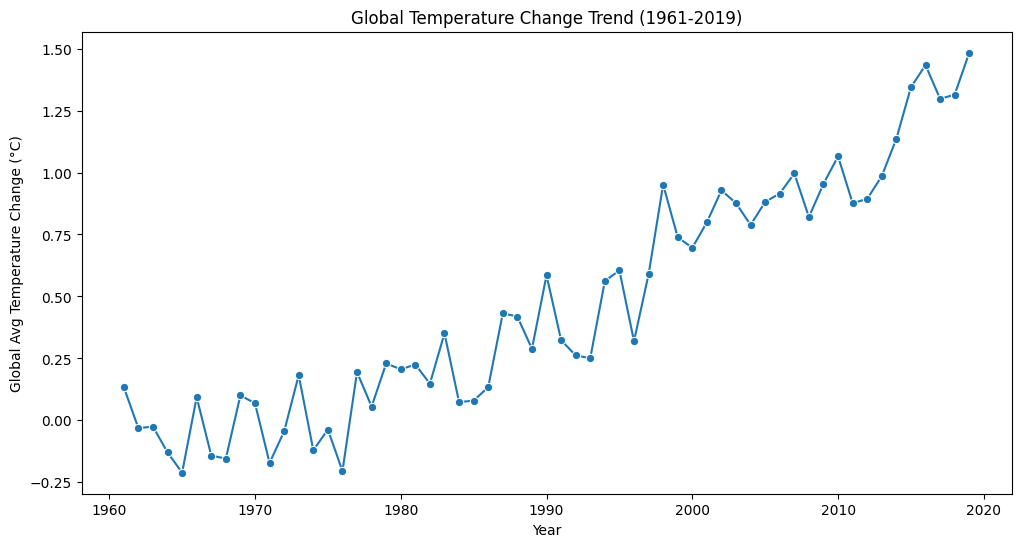

In [77]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=global_avg.index, y=global_avg.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Global Avg Temperature Change (°C)")
plt.title("Global Temperature Change Trend (1961-2019)")
plt.show()

### Tier-list of temp change by area

In [108]:
tcm = df_temp_melted.groupby("Area")["Temperature Change"].mean().sort_values(ascending=False)
tcm.to_csv('Described_parts/tempAreaMeanTierList.csv')
tcm

Area
Serbia                         1.521940
Luxembourg                     1.494692
Montenegro                     1.493042
Estonia                        1.462247
Slovenia                       1.434408
                                 ...   
Falkland Islands (Malvinas)    0.023366
Yugoslav SFR                   0.019089
Midway Island                  0.010874
Pitcairn Islands              -0.018991
Nauru                         -0.115031
Name: Temperature Change, Length: 284, dtype: float64

### Draw the temperature change for each month

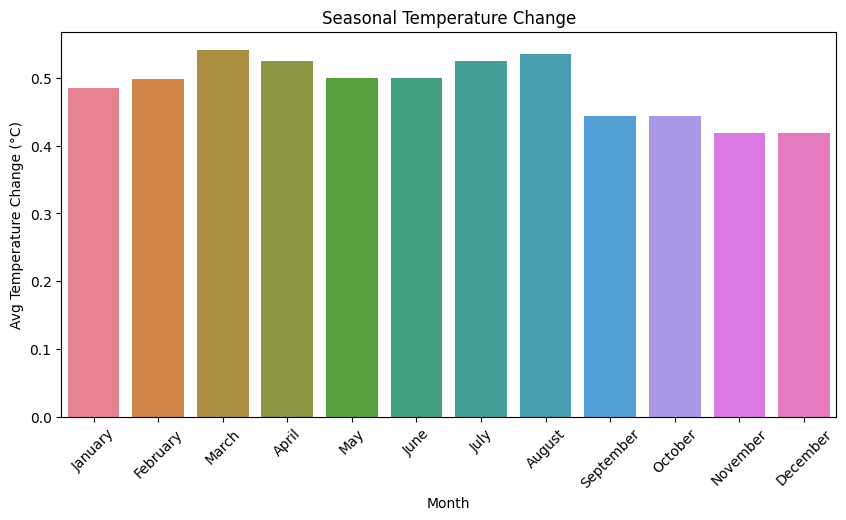

In [109]:
seasonal_change = df_temp_melted.groupby("Months")["Temperature Change"].mean()
seasonal_change = seasonal_change.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
seasonal_change.to_csv('Described_parts/globalTempChangeByMonth.csv')
plt.figure(figsize=(10, 5))
sns.barplot(x=seasonal_change.index, y=seasonal_change.values,hue=seasonal_change.index)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Avg Temperature Change (°C)")
plt.title("Seasonal Temperature Change")
plt.show()

## Analysis in the standard deviation of temperature

In [110]:
global_avg_std = df_std_melted.groupby("Year")["Standard Deviation"].mean()
global_avg_std.to_csv('Described_parts/globalAvgStd.csv')

### Draw the global std trend from 1961-2019

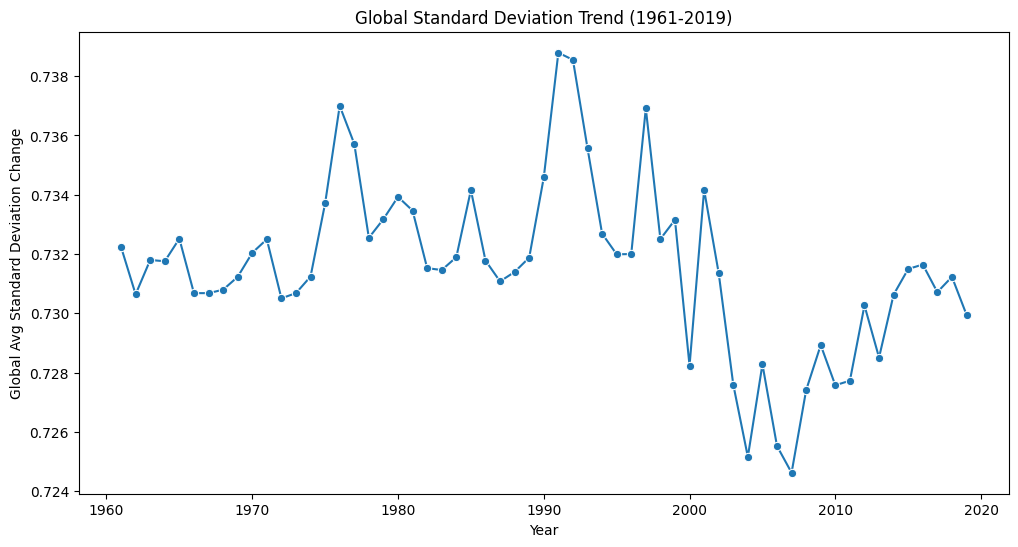

In [81]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=global_avg_std.index, y=global_avg_std.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Global Avg Standard Deviation Change")
plt.title("Global Standard Deviation Trend (1961-2019)")
plt.show()

### Draw the std change for each month

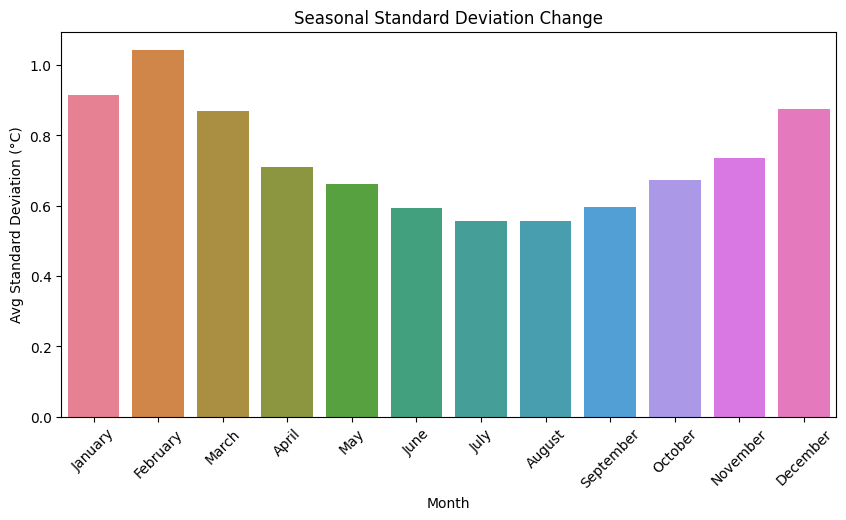

In [111]:
seasonal_std = df_std_melted.groupby("Months")["Standard Deviation"].mean()
seasonal_std = seasonal_std.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
seasonal_std.to_csv('Described_parts/globalStdChangeByMonth.csv')
plt.figure(figsize=(10, 5))
sns.barplot(x=seasonal_std.index, y=seasonal_std.values, hue=seasonal_std.index)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Avg Standard Deviation (°C)")
plt.title("Seasonal Standard Deviation Change")
plt.show()
